<a href="https://colab.research.google.com/github/shubhamgogri/Python--DS/blob/main/Coursera/k-means/Bank_Note_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coursera K-means Project For Bank Note Authentication

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shubhamgogri/Python--DS/main/Coursera/k-means/Banknote-authentication-dataset-.csv")
data.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


Here V1 = variance of Wavelet Transformed image (continuous) 

V2 = skewness of Wavelet Transformed image (continuous)


In [ ]:
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


Here the values are not null, and are of float type..

Although there are negative values in the data... Hence need to normalize them..

In [ ]:
v1 = data["V1"]
v2 = data["V2"]

In [ ]:
data["V1"] = (data["V1"] - data["V1"].min() ) / (data["V1"].max() - data["V1"].min())
data["V2"] = (data["V2"] - data["V2"].min() ) / (data["V2"].max() - data["V2"].min())

In [ ]:
data["V1"].describe()

count    1372.000000
mean        0.539114
std         0.205003
min         0.000000
25%         0.379977
50%         0.543617
75%         0.711304
max         1.000000
Name: V1, dtype: float64

In [ ]:
data["V2"].describe()

count    1372.000000
mean        0.587301
std         0.219611
min         0.000000
25%         0.451451
50%         0.602168
75%         0.770363
max         1.000000
Name: V2, dtype: float64

In [ ]:
print("v1, std deviation: ", v1.std(),"mean: ", v1.mean())
print("v2, std deviation: ", v2.std(),"mean: ", v2.mean())


v1, std deviation:  0.20500346769971411 mean:  0.5391136632764807
v2, std deviation:  0.2196113237409729 mean:  0.5873013774145737


Text(0.5, 1.0, 'V1 vs V2')

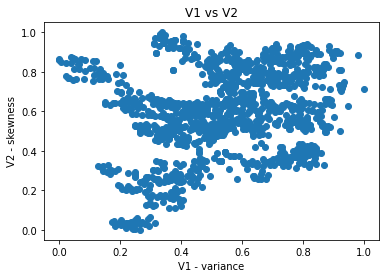

In [ ]:
plt.scatter(data['V1'], data['V2'])
plt.xlabel("V1 - variance")
plt.ylabel("V2 - skewness")
plt.title("V1 vs V2")

(array([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1372 Lists of Patches objects>)

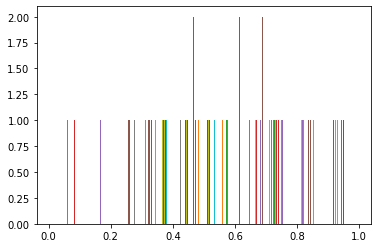

In [ ]:
import seaborn as sns
plt.hist(data)

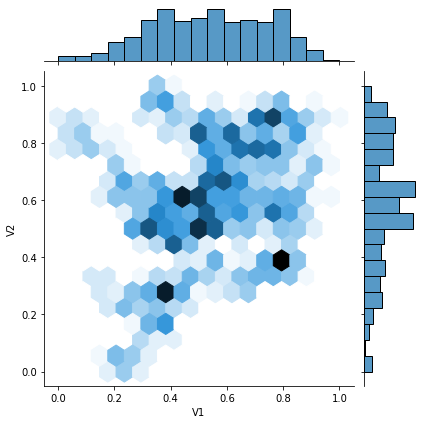

In [ ]:
sns.jointplot(x = 'V1', y = 'V2', data = data, kind = 'hex')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


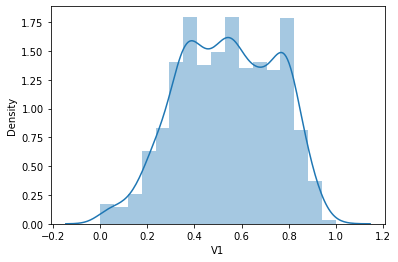

In [ ]:
sns.distplot(data.V1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


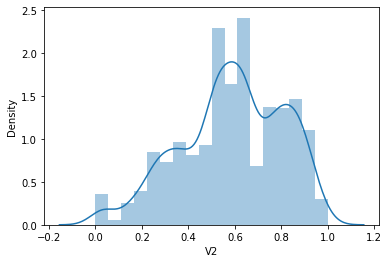

In [ ]:
sns.distplot(data.V2)

From the graph we could conclude that most of the vvaluess for

V1 = -4 to 5

V2 = from -10 to 10 


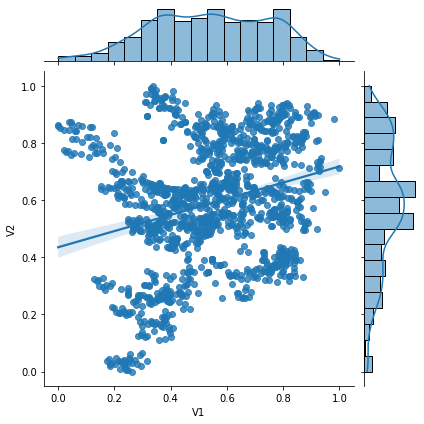

In [ ]:
sns.jointplot(x = 'V1', y = 'V2', data = data, kind = 'reg')

#Elbow Method


Problem with negative sign....

In [ ]:
data.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [ ]:
data["V1"] = data["V1"].replace(np.inf, 0)
data["V2"] = data["V2"].replace(np.inf, 0)

In [ ]:
from sklearn.cluster import KMeans

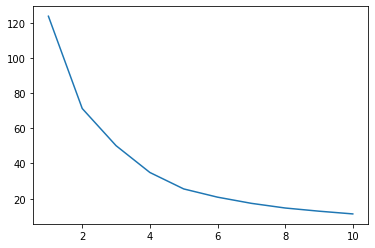

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state= 0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

According to this method we can conclude that there may be 2 clusters in the data


In [ ]:
input_data = np.column_stack((data["V1"], data["V2"]))
kmeans = KMeans(n_clusters = 2, init = "k-means++", n_init = 10, random_state= 0, max_iter= 300).fit(input_data)

In [ ]:
kmeans = kmeans.fit(data)

Text(0.5, 1.0, 'two clusters from V1 and V2')

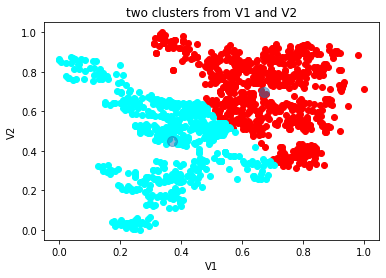

In [ ]:
clusters = kmeans.cluster_centers_
plt.scatter(input_data[kmeans.labels_==0, 0], input_data[kmeans.labels_==0, 1] , color = 'red', label = 0)
plt.scatter(input_data[kmeans.labels_==1, 0], input_data[kmeans.labels_==1, 1], color = 'cyan', label =1)
plt.scatter(clusters[:, 0], clusters[:,1], s = 100, alpha  = 0.5)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("two clusters from V1 and V2")